In [1]:
import os
import shutil
import cv2
import math
import pickle
import imageio
import warnings
import PIL.Image
import numpy as np
from PIL import Image
import tensorflow as tf
from random import randrange
import moviepy.editor as mpy
import matplotlib.pyplot as plt
from IPython.display import clear_output
from moviepy.video.io.ffmpeg_writer import FFMPEG_VideoWriter

warnings.filterwarnings("ignore")


def generate_final_images(latent_vector, direction, coeffs, i):
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeffs*direction)[:8]
    new_latent_vector = new_latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(new_latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    # if size[0] >= 512: img = get_watermarked(img)
    img_path = "/workspace/BabyGAN/for_animation/" + str(i) + ".png"
    img.thumbnail(animation_size, PIL.Image.ANTIALIAS)
    img.save(img_path)
    face_img.append(imageio.imread(img_path))
    clear_output()
    return img


def generate_final_image(latent_vector, direction, coeffs):
    new_latent_vector = latent_vector.copy()
    new_latent_vector[:8] = (latent_vector + coeffs*direction)[:8]
    new_latent_vector = new_latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(new_latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    # if size[0] >= 512: img = get_watermarked(img)
    img.thumbnail(size, PIL.Image.ANTIALIAS)
    img.save("face.png")
    if download_image == True:
        files.download("face.png")
    return img


def plot_three_images(imgB, fs=10):
    f, axarr = plt.subplots(1, 3, figsize=(fs, fs))
    axarr[0].imshow(Image.open(
        '/workspace/BabyGAN/aligned_images/father_01.png'))
    axarr[0].title.set_text("Father's photo")
    axarr[1].imshow(imgB)
    axarr[1].title.set_text("Child's photo")
    axarr[2].imshow(Image.open(
        '/workspace/BabyGAN/aligned_images/mother_01.png'))
    axarr[2].title.set_text("Mother's photo")
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    plt.show()


In [5]:
!rm -rf sample_data
# !git clone https://github.com/tg-bomze/BabyGAN.git
# %cd /workspace/BabyGAN
# !mkdir aligned_images data father_image mother_image

import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator

ffhq_dataset = '/workspace/BabyGAN/ffhq_dataset/latent_directions/'

age_direction = np.load(os.path.join(ffhq_dataset, 'age.npy'))
horizontal_direction = np.load(os.path.join(ffhq_dataset, 'angle_vertical.npy'))
vertical_direction = np.load(os.path.join(ffhq_dataset, 'angle_vertical.npy'))
eyes_open_direction = np.load(os.path.join(ffhq_dataset, 'eyes_open.npy'))
gender_direction = np.load(os.path.join(ffhq_dataset, 'gender.npy'))
smile_direction = np.load(os.path.join(ffhq_dataset, 'smile.npy'))

clear_output()

In [3]:
META_BABY_PATH = '/workspace/BabyGenerator/imgs/baby/'
ALIGN_BABY_PATH = '/workspace/BabyGenerator/aligned_images/'
LATENT_REPRESENTATIONS = '/workspace/BabyGenerator/latent_representations/'
GENERATED_IMAGES = '/workspace/BabyGenerator/generated_images'

In [4]:

if os.path.isdir(ALIGN_BABY_PATH) == False:
    os.mkdir(ALIGN_BABY_PATH)

count = len(os.listdir(META_BABY_PATH))
print('meta baby number: %i' % count)

!python align_images.py $META_BABY_PATH $ALIGN_BABY_PATH
clear_output()

print('finish baby face exsert')
extract_count = len(os.listdir(ALIGN_BABY_PATH))
print('extract baby number: %i' % extract_count)


finish baby face exsert
extract baby number: 7


In [81]:
align_baby_list = os.listdir(ALIGN_BABY_PATH)

images = cv2.imread(os.path.join('/workspace/BabyGenerator/aligned_images/Chiaki5_01.png'))
mask = cv2.imread(os.path.join('/workspace/BabyGenerator/masks/Chiaki5_01.png'))

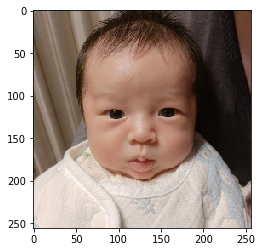

In [82]:
plt.imshow(cv2.resize(cv2.cvtColor(images, cv2.COLOR_BGR2RGB), [256, 256]))

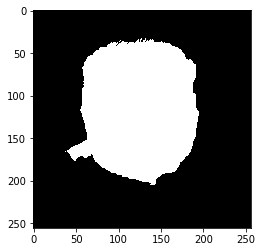

In [83]:
plt.imshow(mask)

True

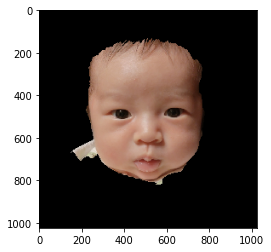

In [84]:
masked_img = cv2.bitwise_and(cv2.resize(images, [256, 256]), mask)
plt.imshow(cv2.resize(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB), [1024, 1024]))
cv2.imwrite('baby.png', cv2.resize(masked_img, [1024, 1024]))

In [5]:
img_dict = {}
for i, path in enumerate(os.listdir(ALIGN_BABY_PATH)):
    img_dict[i] = cv2.imread(os.path.join(ALIGN_BABY_PATH, path))

In [6]:
x = sum(img_dict.values()) / len(img_dict.keys())
cv2.imwrite('x.png', img=x)

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


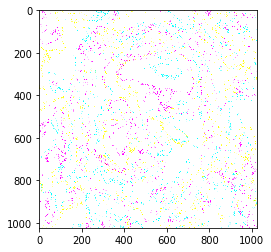

In [7]:
plt.imshow(x)

In [ ]:
# generate baby face latent representation
!rm -r latent_representations
!mkdir latent_representations

#!python encode_images.py --help
!python encode_images.py \
  --early_stopping False \
  --lr=0.25 \
  --batch_size=4 \
  --iterations=200 \
  --output_video=False \
  /workspace/BabyGenerator/test \
  $GENERATED_IMAGES \
  $LATENT_REPRESENTATIONS \
  # --use_l1_penalty=0.5 \

# clear_output()
# if len(os.listdir('/workspace/BabyGAN/generated_images')) == 3:
#   first_face = np.load('/workspace/BabyGAN/latent_representations/father_01.npy')
#   second_face = np.load('/workspace/BabyGAN/latent_representations/mother_01.npy')
#   baby_face = np.load('/workspace/BabyGAN/latent_representations/baby_01.npy')
#   print("Generation of latent representation is complete! Now comes the fun part.")
# else: raise ValueError('Something wrong. It may be impossible to read the face in the photos. Upload other photos and try again.')

In [ ]:
# generate baby face latent representation
# !rm -r latent_representations
# !mkdir latent_representations

# #!python encode_images.py --help
# !python encode_images.py \
#   --early_stopping False \
#   --lr=0.25 \
#   --batch_size=4 \
#   --iterations=200 \
#   --output_video=False \
#   $ALIGN_BABY_PATH \
#   $GENERATED_IMAGES \
#   $LATENT_REPRESENTATIONS \
#   # --use_l1_penalty=0.5 \

# clear_output()
# if len(os.listdir('/workspace/BabyGAN/generated_images')) == 3:
#   first_face = np.load('/workspace/BabyGAN/latent_representations/father_01.npy')
#   second_face = np.load('/workspace/BabyGAN/latent_representations/mother_01.npy')
#   baby_face = np.load('/workspace/BabyGAN/latent_representations/baby_01.npy')
#   print("Generation of latent representation is complete! Now comes the fun part.")
# else: raise ValueError('Something wrong. It may be impossible to read the face in the photos. Upload other photos and try again.')

In [ ]:
dict_baby = {}

if os.listdir(LATENT_REPRESENTATIONS):
    for i, path in enumerate(os.listdir(LATENT_REPRESENTATIONS)):
        dict_baby[i] = np.load(os.path.join(LATENT_REPRESENTATIONS, path))

print('finish load baby latent space')

In [ ]:
# load the generator model
tflib.init_tf()
URL_FFHQ = "/workspace/BabyGenerator/karras2019stylegan-ffhq-1024x1024.pkl"
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
generator = Generator(Gs_network, batch_size=1, randomize_noise=False)
model_scale = int(2*(math.log(1024,2)-1))

In [ ]:
first_face = np.load('/workspace/BabyGAN/latent_representations/father_01.npy')
second_face = np.load('/workspace/BabyGAN/latent_representations/mother_01.npy')

In [ ]:
dict_baby[0].shape, first_face.shape, second_face.shape

In [ ]:
# Generating a child's face

#@markdown *The closer to 0, the more influence the father's genotype will have. Closer to 1 - mother.*
genes_influence = 0.5 #@param {type:"slider", min:0.01, max:0.99, step:0.01}
#@markdown **Styling a photo:**
style = "Default" #@param ["Default", "Father's photo", "Mother's photo"]
if style == "Father's photo": 
  lr = ((np.arange(1,model_scale+1)/model_scale)**genes_influence).reshape((model_scale,1))
  rl = 1-lr
  hybrid_face = (lr*first_face) + (rl*second_face)
elif style == "Mother's photo": 
  lr = ((np.arange(1,model_scale+1)/model_scale)**(1-genes_influence)).reshape((model_scale,1))
  rl = 1-lr
  hybrid_face = (rl*first_face) + (lr*second_face)
else: hybrid_face = ((1-genes_influence)*first_face)+(genes_influence*second_face)
#@markdown **Child's approximate age:**
person_age = 1 #@param {type:"slider", min:10, max:50, step:1}
intensity = -((person_age/5)-6)
#@markdown ---
#@markdown **Download the final image?**
download_image = False #@param {type:"boolean"}
#@markdown **Resolution of the downloaded image:**
resolution = "256" #@param [256, 512, 1024]
size = int(resolution), int(resolution)

face = generate_final_image(hybrid_face, dict_baby[0], 1)
plot_three_images(face, fs = 15)

In [ ]:
dict_baby[0], age_direction

In [ ]:
feat_list = []
for feat in dict_baby.values():
    # feat = feat * average_num
    feat_list.append(feat)

average_baby_face = sum(feat_list) / len(dict_baby.keys())


In [ ]:
average_baby_face 

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.io

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('/workspace/BabyGenerator/data/allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('/workspace/BabyGenerator/data/allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

# We use the first 36 people for training data
trainingFaces = faces[:,:np.sum(nfaces[:36])]
avgFace = np.mean(trainingFaces,axis=1) # size n*m by 1

# Compute eigenfaces on mean-subtracted training data
X = trainingFaces - np.tile(avgFace,(trainingFaces.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

In [ ]:
faces[:, 0]

In [ ]:
im1 = cv2.imread('/workspace/BabyGenerator/aligned_images/Chiaki1_01.png')
im2 = cv2.imread('/workspace/BabyGenerator/aligned_images/Chiaki2_01.png')
im3 = cv2.imread('/workspace/BabyGenerator/aligned_images/Chiaki5_01.png')

im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

# stack = np.dstack((im1, im2))
stack = np.concatenate((im1, im2), axis=-1) # h, w, stack c

avg_face = np.mean(stack,axis=2) # size n*m by 1



In [ ]:
avg_face.shape
plt.imshow(avg_face)